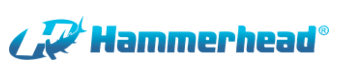
# Assistente Virtual HammerHead

Esta prova de conceito foi concebida com alguns dos dados disponíveis na página `hammerhead.com.br` e pode não refletir com exatidão as informações da empresa. 

In [7]:
from langchain.vectorstores import FAISS
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.chains import ConversationalRetrievalChain
from langchain.llms import OpenAI
import langchain
import config

from langchain.memory import ConversationBufferMemory

from datetime import datetime
from IPython.display import HTML, display
from ipywidgets import widgets

In [8]:
# create the embeddings and load the DB (vectorstore)
embeddings = OpenAIEmbeddings()
vectorstore = FAISS.load_local('./HammerHead/hh_faiss.store', embeddings=embeddings)

In [9]:
# Create a Conversation QA with a memory.

memory = ConversationBufferMemory(memory_key="chat_history", return_messages=True)

qa = ConversationalRetrievalChain.from_llm(
    llm=OpenAI(temperature=0), 
    retriever=vectorstore.as_retriever(), 
    memory=memory,
    return_source_documents=False,
    verbose=False

)

## Adding the Interactive Chat

In [14]:
import ipywidgets as widgets
from IPython.display import display

# Create the widgets
txt_input = widgets.Textarea(placeholder='Escreva sua pergunta e aperte enviar')
btn_send = widgets.Button(description='Send')
out = widgets.Output(layout={'border': '1px solid black'})

# Simulated chatbot response
def get_chatbot_response(input_text):
    
    response = qa({"question": f"{input_text}"})
    answer = response["answer"]

    return f'Assistente: {answer}'

def on_send_button_clicked(b):
    # When button is clicked, print the text and clear the input box
    with out:
        print('Usuário: ' + txt_input.value)
        print(get_chatbot_response(txt_input.value))
    txt_input.value = ''

btn_send.on_click(on_send_button_clicked)

# Display the widgets
display(out, txt_input, btn_send)

with out:
    print('Escreva sua pergunta e aperte enviar')
    print('Chatbot: Boa tarde, sou o assistente virtual HammerHead. Você tem alguma dúvida sobre nossos produtos?')
    
txt_input.value = "Quais categorias de produtos vocês trabalham?"

Output(layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border_right='1px solid b…

Textarea(value='', placeholder='Escreva aqui sua pergunta')

Button(description='Send', style=ButtonStyle())